In [1]:
from multiscaleio.datasets.get_arpa import get_arpa
from multiscaleio.core.expansions import ReshiftedExpansion, MultiscaleExpansion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
arpa21 = get_arpa(n_jobs=1, years=["2021"]).query("provincia=='MI'").reset_index(drop=True)

In [8]:
rs = ReshiftedExpansion(window=4, date_col="data", keep_t0=True)
data = rs.fit_transform(arpa21.drop(["lng", "lat", "provincia"], axis=1))

In [9]:
sh = pd.DataFrame(data, columns=rs.get_feature_names_out())
sh.head()

,data,Ammoniaca,Arsenico,Benzene,Benzo(a)pirene,Biossido di Azoto,Biossido di Zolfo,BlackCarbon,Cadmio,Monossido di Azoto,...,BlackCarbon_shift_3,Cadmio_shift_3,Monossido di Azoto_shift_3,Monossido di Carbonio_shift_3,Nikel_shift_3,Ossidi di Azoto_shift_3,Ozono_shift_3,PM10 (SM2005)_shift_3,Particelle sospese PM2.5_shift_3,Piombo_shift_3
0,2019-01-01,6.6,NaN,2.875,0.919,43.578385,3.314167,4.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,2.4,NaN,1.325,0.5835,28.884983,2.620833,1.35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,0.9,NaN,1.525,0.2975,47.832188,4.053333,1.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,3.7,NaN,3.0,NaN,76.033073,5.010833,5.7,NaN,NaN,...,4.3,NaN,NaN,1.070556,NaN,91.307222,5.857837,93.285714,74.333333,NaN
4,2019-01-05,6.1,NaN,4.0,3.2965,75.724219,5.55,7.4,NaN,NaN,...,1.35,NaN,NaN,0.738843,NaN,53.753611,37.436905,26.142857,15.0,NaN


In [5]:
ms = MultiscaleExpansion(scale=[3, 7], date_col="data")
data = ms.fit_transform(sh)

In [6]:
sc = pd.DataFrame(data, columns=ms.get_feature_names_out())
sc.head()

,data,Ammoniaca_mean_3,Arsenico_mean_3,Benzene_mean_3,Benzo(a)pirene_mean_3,Biossido di Azoto_mean_3,Biossido di Zolfo_mean_3,BlackCarbon_mean_3,Cadmio_mean_3,Monossido di Azoto_mean_3,...,BlackCarbon_shift_3_mean_7,Cadmio_shift_3_mean_7,Monossido di Azoto_shift_3_mean_7,Monossido di Carbonio_shift_3_mean_7,Nikel_shift_3_mean_7,Ossidi di Azoto_shift_3_mean_7,Ozono_shift_3_mean_7,PM10 (SM2005)_shift_3_mean_7,Particelle sospese PM2.5_shift_3_mean_7,Piombo_shift_3_mean_7
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,13.7,NaN,3.625,NaN,61.793704,3.461574,7.233333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,13.466667,NaN,3.5,NaN,60.985411,3.475,6.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,13.1,NaN,3.408333,NaN,62.072697,3.423611,6.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
arpa_ = arpa21.drop(["provincia", "lng", "lat", "data"], axis=1)

In [21]:
from tslearn.clustering import TimeSeriesKMeans

dc = pd.concat((arpa_["Benzene"].rolling(7).std().index.values, arpa_["Benzene"].rolling(7).std()), axis=1)
tsk = TimeSeriesKMeans(n_clusters=7)
pred = tsk.fit_predict()
pred


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

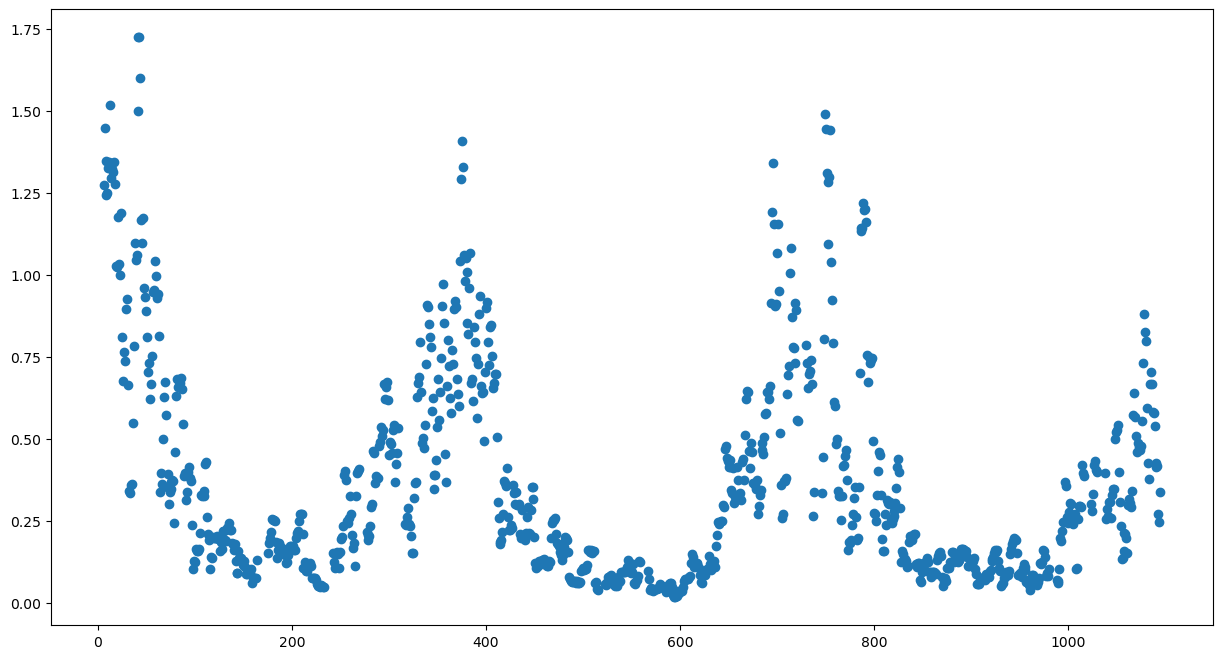

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.scatter(arpa_["Benzene"].rolling(7).std().index, arpa_["Benzene"].rolling(7).std())

In [8]:
from multiscaleio.core.interpolate import ProphetInterpolator

pdata = arpa21[["data", "Ozono"]].reset_index(drop=True).copy()
pdata["Ozono"][int(len(pdata)/1.15):] = np.nan
pi = ProphetInterpolator(
    date_index="data", 
    uncertainty_fit_logs=True, 
    add_sampled_uncertainty=True,
    growth="flat"
)
int_ = pi.fit_transform(pdata)

c:\Users\Tobia\anaconda3\envs\multiscaleio\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
C:\Users\Tobia\AppData\Local\Temp\ipykernel_12104\110869477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdata["Ozono"][int(len(pdata)/1.15):] = np.nan
c:\Users\Tobia\multiscaleio\multiscaleio\common\validate.py:24: UserWarning: Quote of missing values in passed array is greater than 35% so imputing them could lead to unexpected future behaviours. Consider excluding it from the analysis.
  warnings.warn(
c:\Users\Tobia\multiscaleio\multiscaleio\core\interpolate.py:174: UserWarn

<AxesSubplot: >

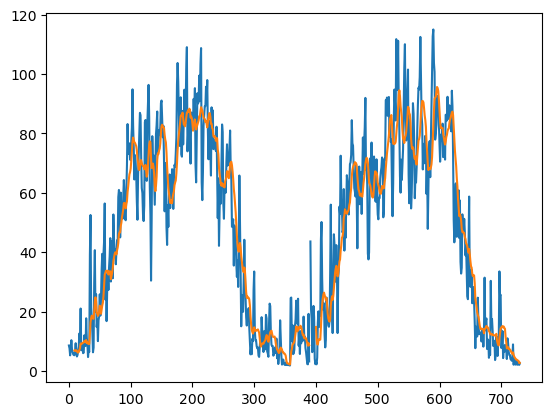

In [13]:
arpa21["Ozono"].plot()
arpa21["Ozono"].rolling(10).mean().plot()

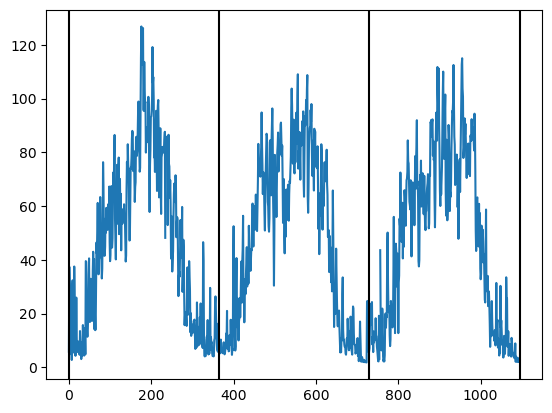

In [41]:
arpa21["Ozono"].plot()
plt.axvline(0, c="k")
plt.axvline(365, c="k")
plt.axvline(365*2, c="k")
plt.axvline(365*3, c="k")

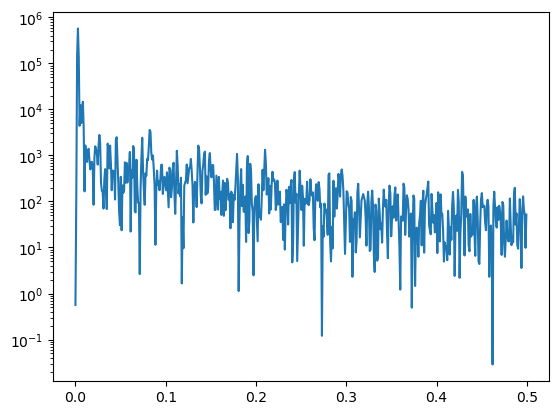

In [42]:
from scipy import signal

detr_oz = np.diff(arpa21["Ozono"])
pws = signal.welch(
    np.nan_to_num(arpa21["Ozono"], np.nanmedian(detr_oz)), nperseg=len(detr_oz)
)
plt.semilogy(pws[0], pws[1])

In [52]:
pr = np.argpartition(pws[1], -4)[-4:]

In [ ]:
1 / pws[0][np.argmax(pws[1])]

In [54]:
np.array(1 / pws[0][pr], dtype=int)#[np.argmax(pws[1])]

array([121, 365, 547, 273])

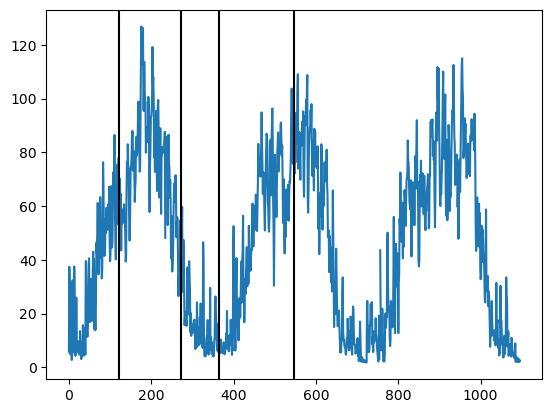

In [55]:
arpa21["Ozono"].plot()
plt.axvline(121, c="k")
plt.axvline(365, c="k")
plt.axvline(547, c="k")
plt.axvline(273, c="k")

In [83]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
stdr = pdata["Ozono"][:int(len(pdata)/1.15)]
L = len(pdata["Ozono"][:int(len(pdata)/1.15)])
idx, stdr = np.arange(L), stdr.fillna(stdr.mean())
cdata = np.concatenate((idx[:, None], stdr.values[:, None]), axis=1)
pred = km.fit_predict(cdata)
pd.Series(pred).value_counts()

c:\Users\Tobia\anaconda3\envs\multiscaleio\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1    231
2    207
0    197
dtype: int64

<AxesSubplot: >

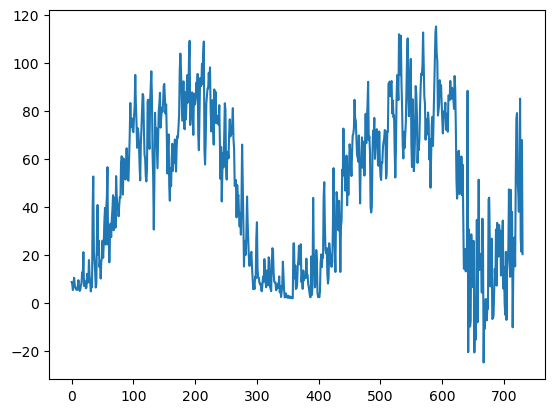

In [72]:
pd.Series(int_).plot()

In [69]:
from multiscaleio.core.sample_interval import UncertaintySampler

us = UncertaintySampler(pi.err, distributions="real_line_supported")

AttributeError: 'ProphetInterpolator' object has no attribute 'err'

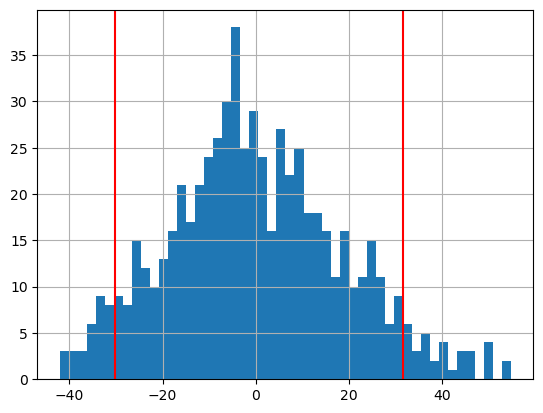

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pi.err.hist(bins=50, ax=ax)
ax.axvline(pi.err.quantile(.95), c="r")
ax.axvline(pi.err.quantile(.05), c="r")

In [60]:
from prophet import Prophet
from multiscaleio.core.time_utils import auto_seasonality

pdata = pdata.rename({"data": "ds", "Ozono": "y"}, axis=1)
train = pdata[:int(len(pdata)/1.15)]
test = pd.DataFrame(pdata[int(len(pdata)/1.15):]["ds"])

seas_per = auto_seasonality(train["y"], nperseg=len(train["y"].dropna()))
p = Prophet(growth="flat", yearly_seasonality=True)
# _ = p.add_seasonality("auto", seas_per, fourier_order=3)

_ = p.fit(train)
pred = p.predict(test)

<AxesSubplot: >

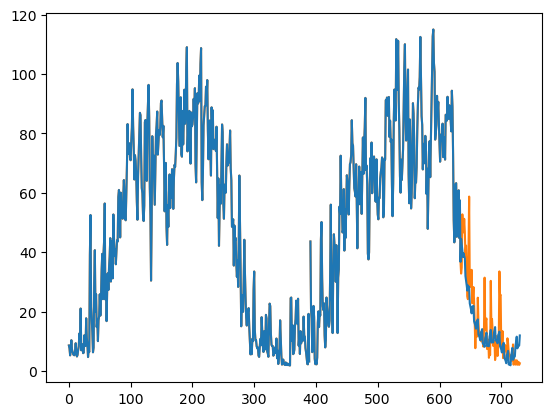

In [62]:
import matplotlib.pyplot as plt

pd.concat((train.y, pred.yhat), axis=0).reset_index(drop=True).plot(zorder=1)
arpa21["Ozono"].reset_index(drop=True).plot(zorder=-1)